### D19026
### Rahul Aggarwal

## Sampling Distribution

**Introduction** - The distribution of a sample over stastics is called the sampling distribution of statsics. The estimate of distribution depends on spread and spread can be qunatified by standard deviation of the estimates obtained from population or all possible samples from population. As  It's hard to summarize the from whole census or some cases we dont have census available for observation.So in this exercise our objective is to check if any other method like bootstrap or central limit theorem holds good or not.

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
attrition=pd.read_csv("attrition.csv")

In [3]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2


#### Ques.1
Plot the distribution of Monthly Income

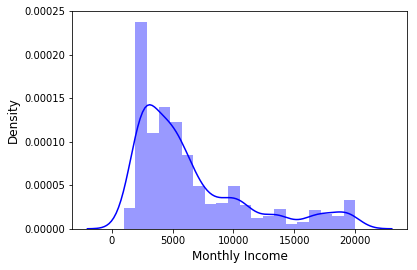

6502.931292517007


In [4]:
#selecting our varable of ineterest monthly income in population variable
population=attrition["MonthlyIncome"]
sns.distplot(population,color='blue')                 # Plotting our population mean
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
print(np.mean([population]))

#### Ques.2 
Draw a sample of size 200. Plot sample distribution of variable and comment wether it represents population distribution

In [5]:
sample1=np.random.choice(population.index,200)   # Selecting 200 random variabel form population

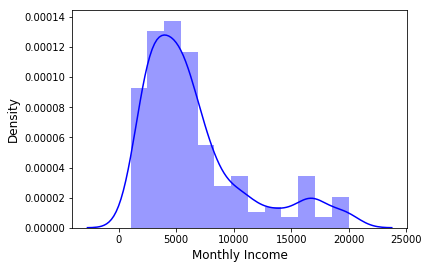

6547.4


In [13]:
sns.distplot(population.iloc[sample1],color='blue')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
print(np.mean(population.iloc[sample1]))

**Observation : After comparing above both graphs and mean we can see that sample represents the population distribution.**

#### Ques.3 
Draw random sample of size 200 with replacement from the sample collected in Ques 2. Plot the histogram and comment if it represents population and sample.

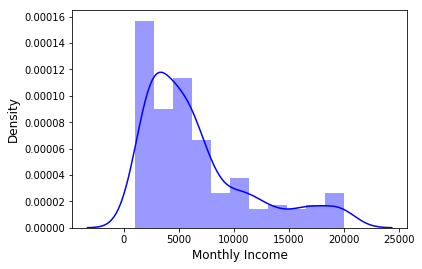

6610.115


In [14]:
sample2=np.random.choice(population.iloc[sample1],200,replace=True) #Taking a sample of 200 from sample 1 with replacement
sns.distplot(sample2,color='blue')     
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
print(np.mean(sample2))

After comparing above both graphs and mean, we can say that bootstrap sample represents the population and 
sample it taken from.

#### Ques.4
Repeat Step 3, 10 times and note observations.

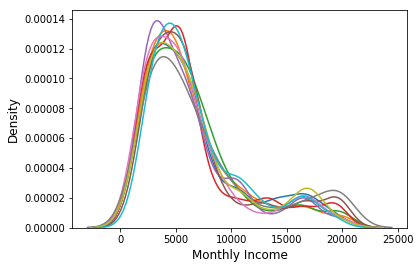

In [15]:
for i in range (0,10):
    bootstrap_sample=np.random.choice(population[sample1],200,replace=True)  #Sampling of size 200 in every itertaion
    sns.distplot(bootstrap_sample,hist=False)                      #Plotting mean of every sample in graph.
    plt.xlabel('Monthly Income', fontsize=12)
    plt.ylabel('Density', fontsize=12)

**Observation : From the above graph we can see that every bootstrap sample have shape similar to original sample and population with little variation in mean.**

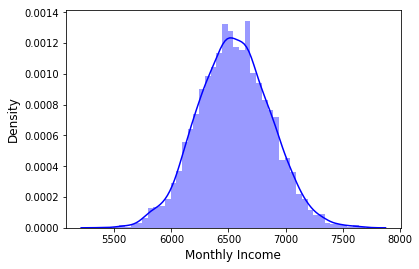

6549.160984


In [16]:
#Calculating and plotting mean of bootsrap samples from sample1 for 5000 subsamples of size 200 each
bootstrap_mean=[]
for i in range (0,5000):
    bootstrap_sample=np.random.choice(population[sample1],200,replace=True)
    bootstrap_mean.append(np.mean(bootstrap_sample))
sns.distplot(bootstrap_mean,color='blue')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
print(np.mean(bootstrap_mean))

#### Ques. 5
Check if Central Limit Theorem holds using the variable Monthly Income

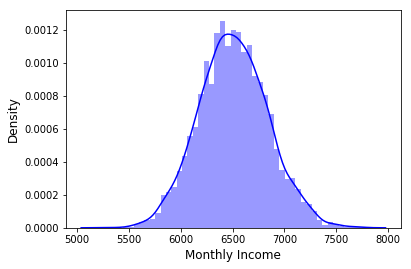

6508.635912182436


In [17]:
clt_mean=[]        # To Save central limit theorem mean
for j in range(1,5000):
    clt_sample=np.random.choice(population,200,replace=True) #Sampling of size 1000 in every itertaion
    clt_mean.append(np.mean(clt_sample))                      #Appending mean of every itertaion
sns.distplot(clt_mean,color='blue')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
print(np.mean(clt_mean))

**Observation: From Above mean and Graph we can see that central limit theorem holds good for larger set of sample size.**

#### Ques.6
Calcualte bootsrap estimate of S.E. of the average monthly income suing the sample S. Check whether it agrees with the result of CLT.

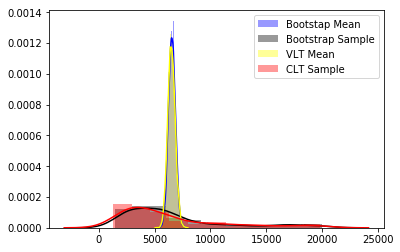

In [44]:
# To check sample distribution and mean of Bootsrap and CLT samples

sns.distplot(bootstrap_mean,color='blue',label='Bootstap Mean')
sns.distplot(bootstrap_sample,color='black',label='Bootstrap Sample')
sns.distplot(clt_mean,color='yellow',label='VLT Mean')
sns.distplot(clt_sample,color='red',label='CLT Sample')

plt.legend()
plt.show()

In [45]:
print(np.mean(bootstrap_mean))   # Calculating mean from list of mean of bootstrap samples.
print(np.std(bootstrap_mean))    # Calculating S.E. from list of mean of bootstrap samples.
print(np.mean(clt_mean))         # Calculating mean from list of mean of CLT samples.
print(np.std(clt_mean))          # Calculating S.E. from list of mean of CLT samples.

6549.160984
316.53144442973075
6508.635912182436
333.5568414534533


In [46]:
print(np.std(population)/np.sqrt(200))    # Calculating S.E. from population samples for n=200
print(np.mean(population))                # Calculating mean of population samples.

332.78956517186776
6502.931292517007


**Conclusion:
From the all above observations it is clear that bootstrap as well as Central Limut theorem hold good and both are follwoing the result of S.E. i.e 
if X(i) ~ N (mu , sigma)
then for CLT and bootstrapping
X(j)~ N(mu,sigma/sqrt(n)) for samples = n**

**and both can be used in place of using population to find the spread**